### Boosting

(a)

Read the training and test csv datasets

In [1]:
from numpy import genfromtxt
import numpy as np
X_Train = genfromtxt('X_train.csv', delimiter=',')
Y_Train = genfromtxt('Y_train.csv', delimiter=',')
X_Test = genfromtxt('X_test.csv', delimiter=',')
Y_Test = genfromtxt('Y_test.csv', delimiter=',')

Adding a dimension +1 to the input Training data set

In [2]:
a=np.empty(len(X_Train))
a.fill(1)
X_Train_new=np.column_stack([X_Train,a])

b=np.empty(len(X_Test))
b.fill(1)
X_Test_new=np.column_stack([X_Test,b])

Setting yi = 0 to yi = −1 in the training set

In [3]:
Y_Train_new=np.where(Y_Train==0, -1, Y_Train)
Y_Test_new=np.where(Y_Test==0, -1, Y_Test)


In [4]:
def pred(x,w):
    y_pred=[]
    for i in range(len(x)):
        yp=np.dot(x[i].T,w)
        if yp>0:
            y_pred.append(1)
        else:
            y_pred.append(-1)
    return y_pred

In [5]:
def error(y_pred,y_test,wt):
    er=0
    for i in range(len(y_pred_train)):
        if y_pred[i] != y_test[i]:
            er=np.add(er,wt[i])
    return er

In [94]:
import math
import numpy as np

# Assign wt as 1/n initially
n=1/len(X_Train_new)
wt=np.zeros(shape=(len(X_Train_new)))
for i in range (len(X_Train_new)):
    wt[i]=n

# set iteration count
it=1500
sel=np.zeros(shape=(it,len(X_Train_new)))
alpha=np.zeros(it)
er=np.zeros(it)
tr_er=np.zeros(it)
te_er=np.zeros(it)
w=np.zeros(shape=(it,len(X_Train_new[0])))
for t in range(it):
    print("Iteration: ",t)
    ss=np.random.choice(X_Train_new.shape[0],int(len(X_Train_new)) ,p=wt)
    sel[t]=ss
    samp_x=X_Train_new[ss, :]
    samp_y=Y_Train_new[ss]
    
    
    p1=np.linalg.inv(np.dot(samp_x.T,samp_x))
    p2=np.dot(samp_x.T,samp_y)
    w[t]=np.dot(p1,p2)
    
    y_pred_train=pred(X_Train_new,w[t])
    
    
    er[t]=error(y_pred_train,Y_Train_new,wt)
    
    
    if er[t]>0.5:
        w[t]=np.negative(w[t])
        
        y_pred_train=pred(X_Train_new,w[t])
        er[t]=error(y_pred_train,Y_Train_new,wt)
       
    alpha[t]=0.5*np.log((1-er[t])/er[t])
    
    cc=np.prod([wt,np.exp(-alpha[t]*Y_Train_new*y_pred_train)],axis=0)
    den=np.sum(cc)
    wt=np.divide(cc,den)
    

Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57
Iteration:  58
Iteration:  59
Iteration:  60
Iteration:  61
Iteration:  62
Iteration:  63
Iteration:  64
Iteration:  65
Iteration:  66
Itera

In [66]:
def pred2222(X,w,a,Y,sol):
    pred=[]
#     print(sol[0])
   
    for i in range(len(X)):
        
#         print(np.dot(a,np.dot(X[i].T,w)))
        if (np.dot(a,np.dot(X[i].T,w)))>0 :
            sol[i]=np.add(sol[i],np.dot(a,1))
        else:
            sol[i]=np.add(sol[i],np.dot(a,-1))
        if sol[i]>0:
            pred.append(1)
        else:
            pred.append(-1)
    te=0
    for i in range(len(X)):
        if pred[i] != Y[i]:
            te=te+1
    te_er=te/len(X)
    return te_er,sol

In [67]:

sol_tr=np.zeros(shape=(len(X_Train_new)))
sol_te=np.zeros(shape=(len(X_Test_new)))

it=1500
train=np.zeros(it)
test=np.zeros(it)
for t in range(it):
#     pred2(X_Train_new,w[t],alpha[t],Y_Train_new,sol_tr)
#     print("a")
#     print(alpha[t])
#     why(alpha[t])
#     pred2222(X_Train_new,w[t],alpha[t],Y_Train_new,sol_tr)
#     print(sol_tr)
    t1,sol_tr=pred2222(X_Train_new,w[t],alpha[t],Y_Train_new,sol_tr)
#     print(t1)
#     print(sol_tr)
#     print("b")
    train[t]=t1
    t2,sol_te=pred2222(X_Test_new,w[t],alpha[t],Y_Test_new,sol_te)
#     print("c")
    test[t]=t2

##### Plot showing the training and testing error of fboost(t) (·) for t = 1,...,T, T = 1500 rounds.  

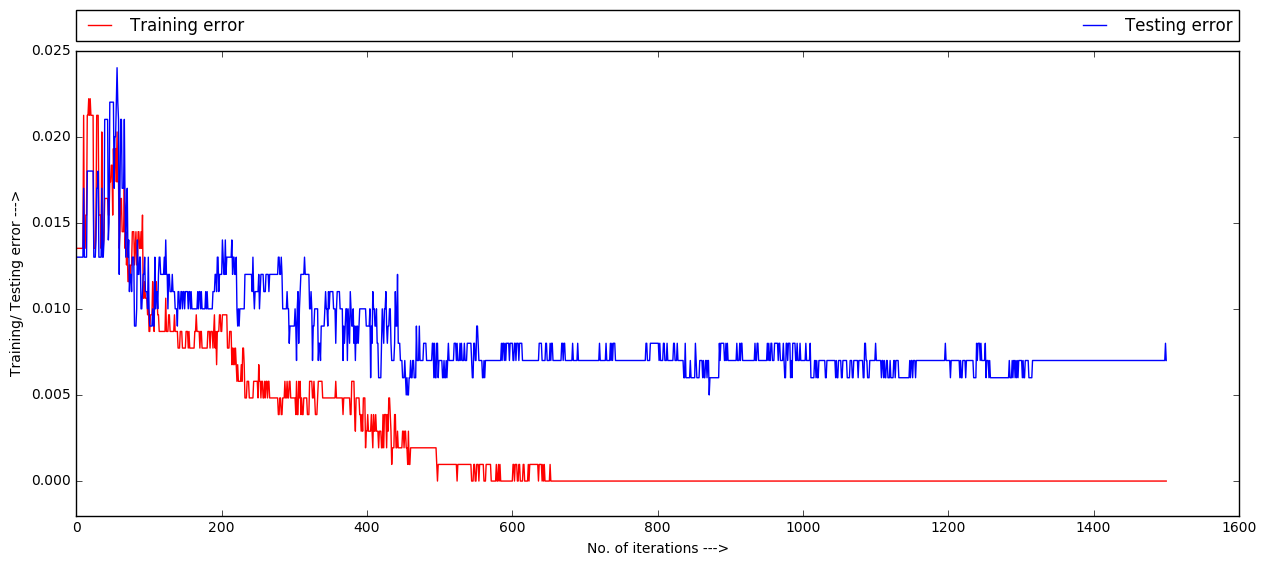

In [123]:
import matplotlib.pyplot as plt
t = np.arange(1,1501)
plt.figure(figsize=(15,6))
plt.plot(t, train, 'r',label="Training error")
plt.plot(t, test, 'b',label="Testing error")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
# plt.legend(handles=[line2], loc=4)
plt.ylim((-.002,.025))
plt.xlabel("No. of iterations --->")
plt.ylabel("Training/ Testing error --->")
plt.show()

##### (b) Plot showing the upper bound on the training error as a function of t 

In [187]:
up=np.zeros(it)
from math import pow, exp
a=0
for t in range(it):
    
    a=a+pow((0.5-er[t]),2)
    up[t]=exp(-2*a)

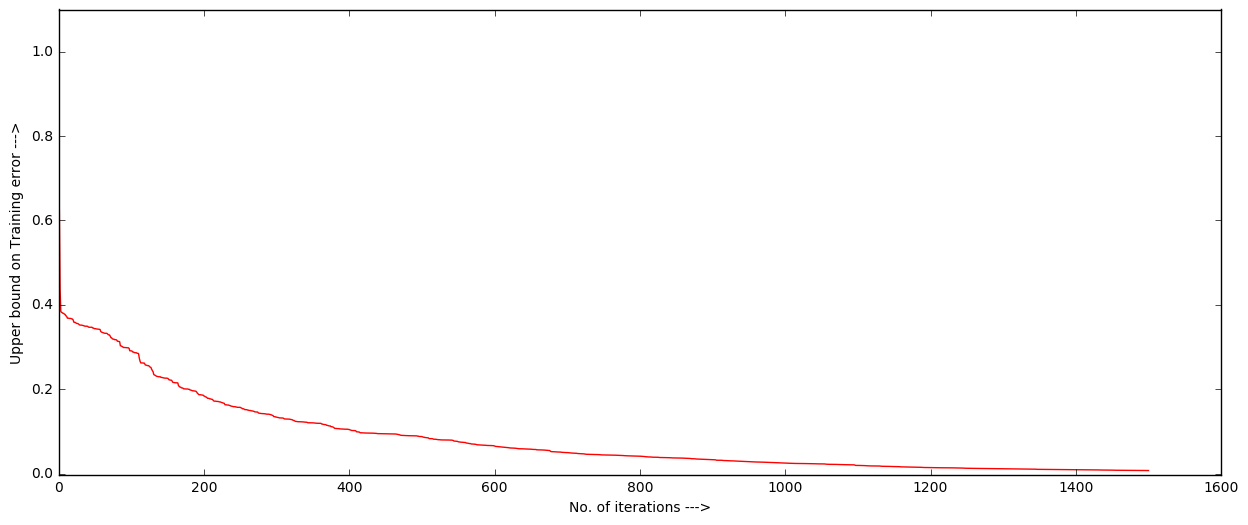

In [190]:
t = np.arange(1,1501)
plt.figure(figsize=(15,6))
plt.plot(t, up, 'r')
plt.ylim((-.002,1.1))
plt.xlabel("No. of iterations --->")
plt.ylabel("Upper bound on Training error --->")
plt.show()

##### (c)	Histogram of the total number of times each training data point was selected by the bootstrap method across all rounds 


In [191]:
flat=sel.flatten()
flat=flat.astype(int)

unique, counts = np.unique(flat, return_counts=True)

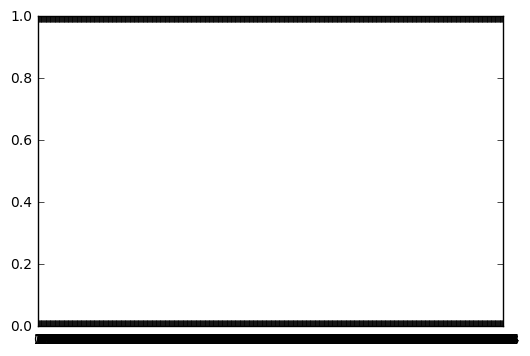

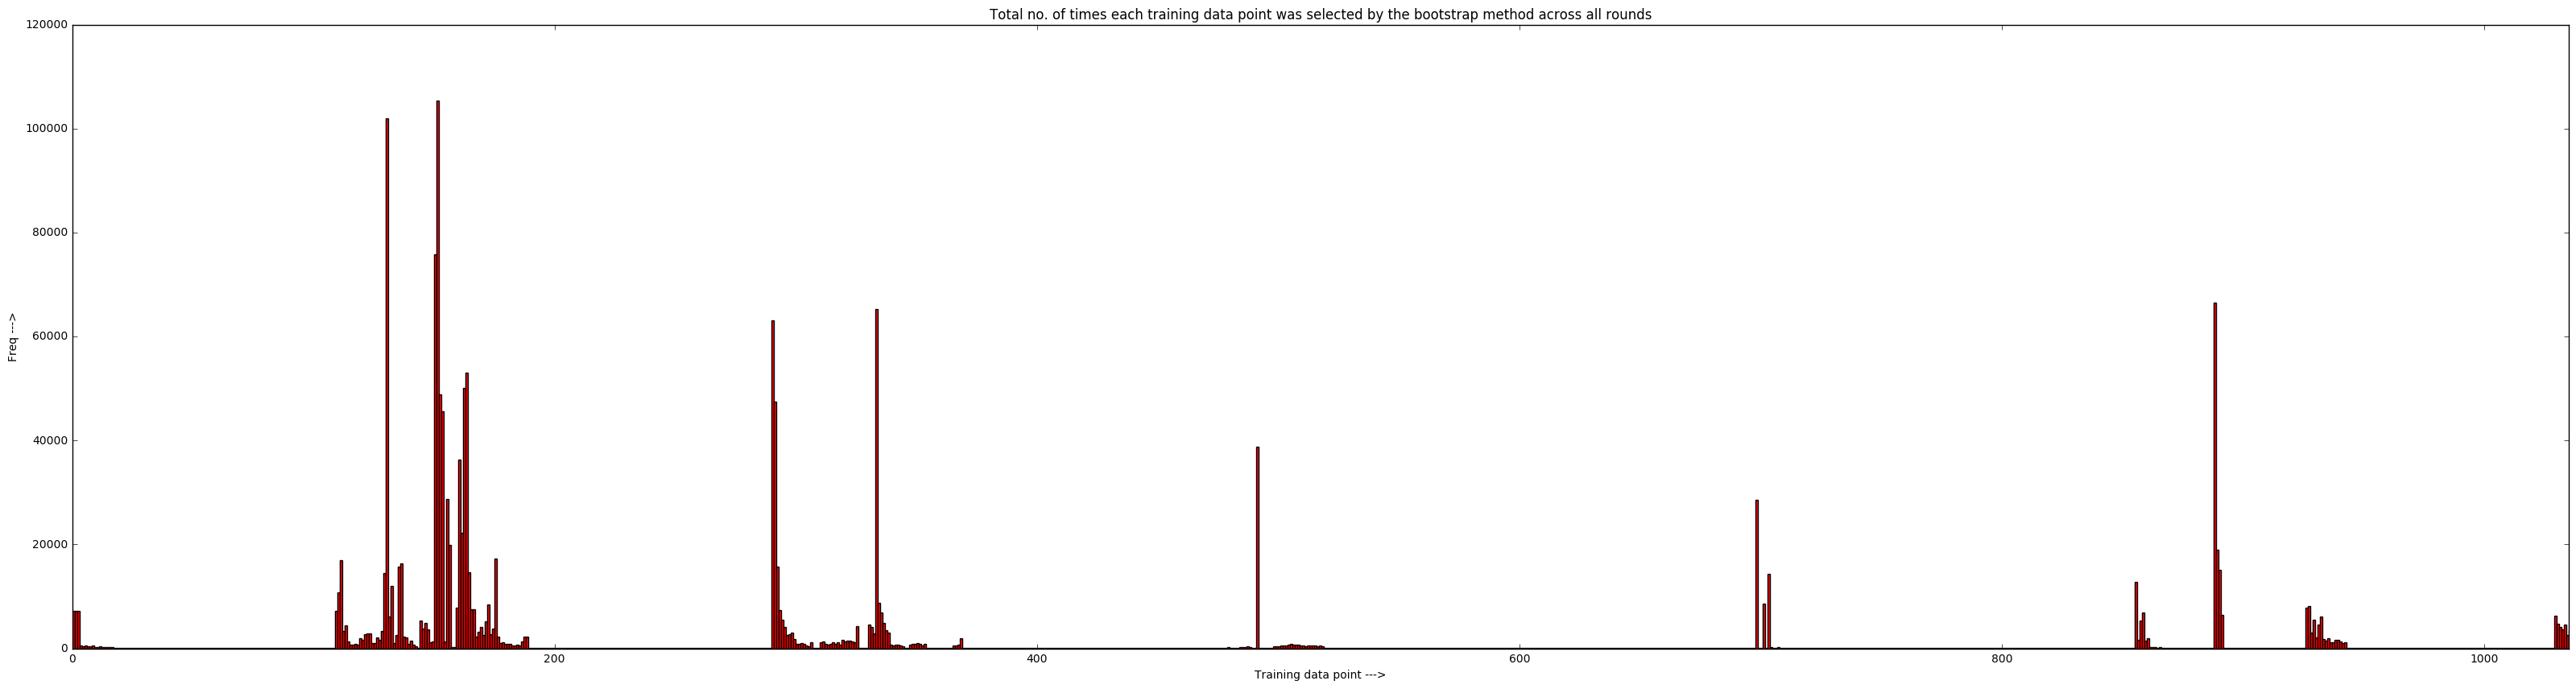

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# alphab = ['A', 'B', 'C', 'D', 'E', 'F']
# frequencies = [23, 44, 12, 11, 2, 10]

pos = np.arange(len(unique))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(unique)
plt.figure(figsize=(40,10))
plt.xlim((0,1035))
plt.bar(pos, counts, width, color='r')
plt.title("Total no. of times each training data point was selected by the bootstrap method across all rounds")
plt.xlabel("Training data point --->")
plt.ylabel("Freq --->")
plt.show()

##### (d)	 Plots showing εt and αt as a function of t 



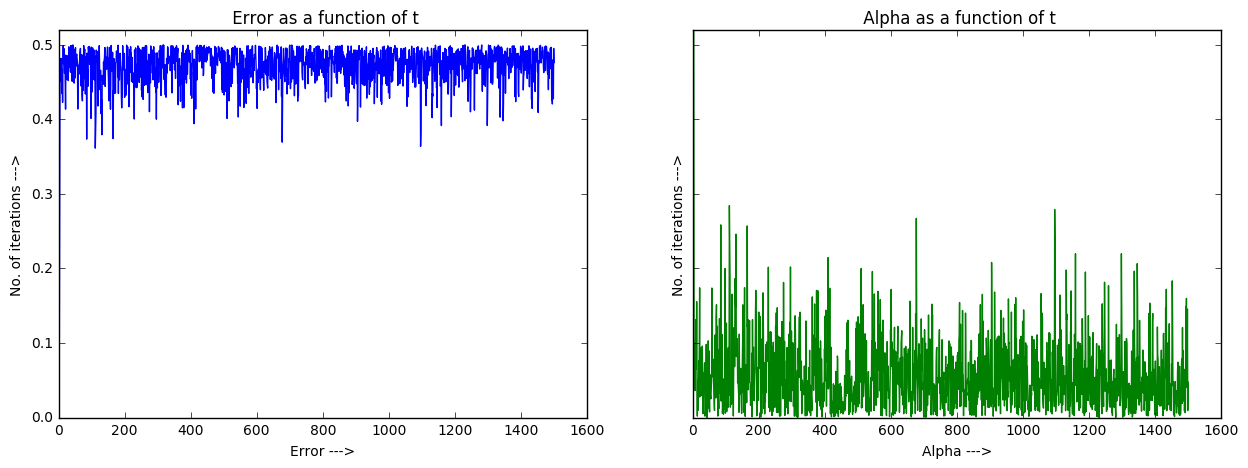

In [169]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,5))
ax1.plot(t, er)
ax1.set_title(" Error as a function of t")
ax1.set_ylabel('No. of iterations --->')
ax1.set_xlabel('Error --->')
ax1.set_ylim((0,0.52))
ax2.plot(t, alpha,'g')
ax2.set_title(" Alpha as a function of t")
ax2.set_ylabel('No. of iterations --->')
ax2.set_xlabel('Alpha --->')
plt.show()